# *MorQuest Code*: example at U.S. West Coast 

The focus of this study is on the **U.S. West Coast**, particularly on the estuaries. It is crucial to analyze and study these estuaries to preserve biodiversity, support fisheries, mitigate climate change, maintain water quality, manage coastal resources, and advance knowledge. To achieve this purpose, **eight** estuaries were identified, with at least **30 years** of information on various factors such as intertidal area, closing depth, slope of the active coastal zone, river discharge, and tidal range. These variables were studied to determine their sensitivity and analyze their projections due to the impact of sea level rise.

The following analysis was developed by Reyes, M. in 2023 and is outlined in the thesis titled "Assessing Sea Level Rise Impact on Estuarine Morphodynamics." This thesis was submitted to obtain the academic degree of Master in Water and Sustainable Development at IHE Delft. You can find more information about it at https://ihedelftrepository.contentdm.oclc.org/digital/collection/masters1/id/338392.

## 1. Initial settings
Refer to the **Installation** section of the README for instructions on how to install the Python packages necessary to run the software.

In [50]:
%load_ext autoreload
%autoreload 2
import os
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.io
import warnings
warnings.filterwarnings("ignore")

from morQuest import Run_morquest, morquest_set_input
from Image import display_images
from Intertidal_analysis import analyze_intertidal_area
from Hydrology_analysis import analyze_hydrology
from Tidal import analyze_tidal_data
from Channel_analysis import analyze_channel_area
from Nearshore_Slopes_analysis import analyze_nearshore_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Data Collection
In the first phase of the study, the focus is on selecting comprehensive datasets that provide enough information for subsequent analysis. The next step involves gathering relevant data.

### 2.1 Study Area
A photographic view of the analyzed estuaries will now be presented.

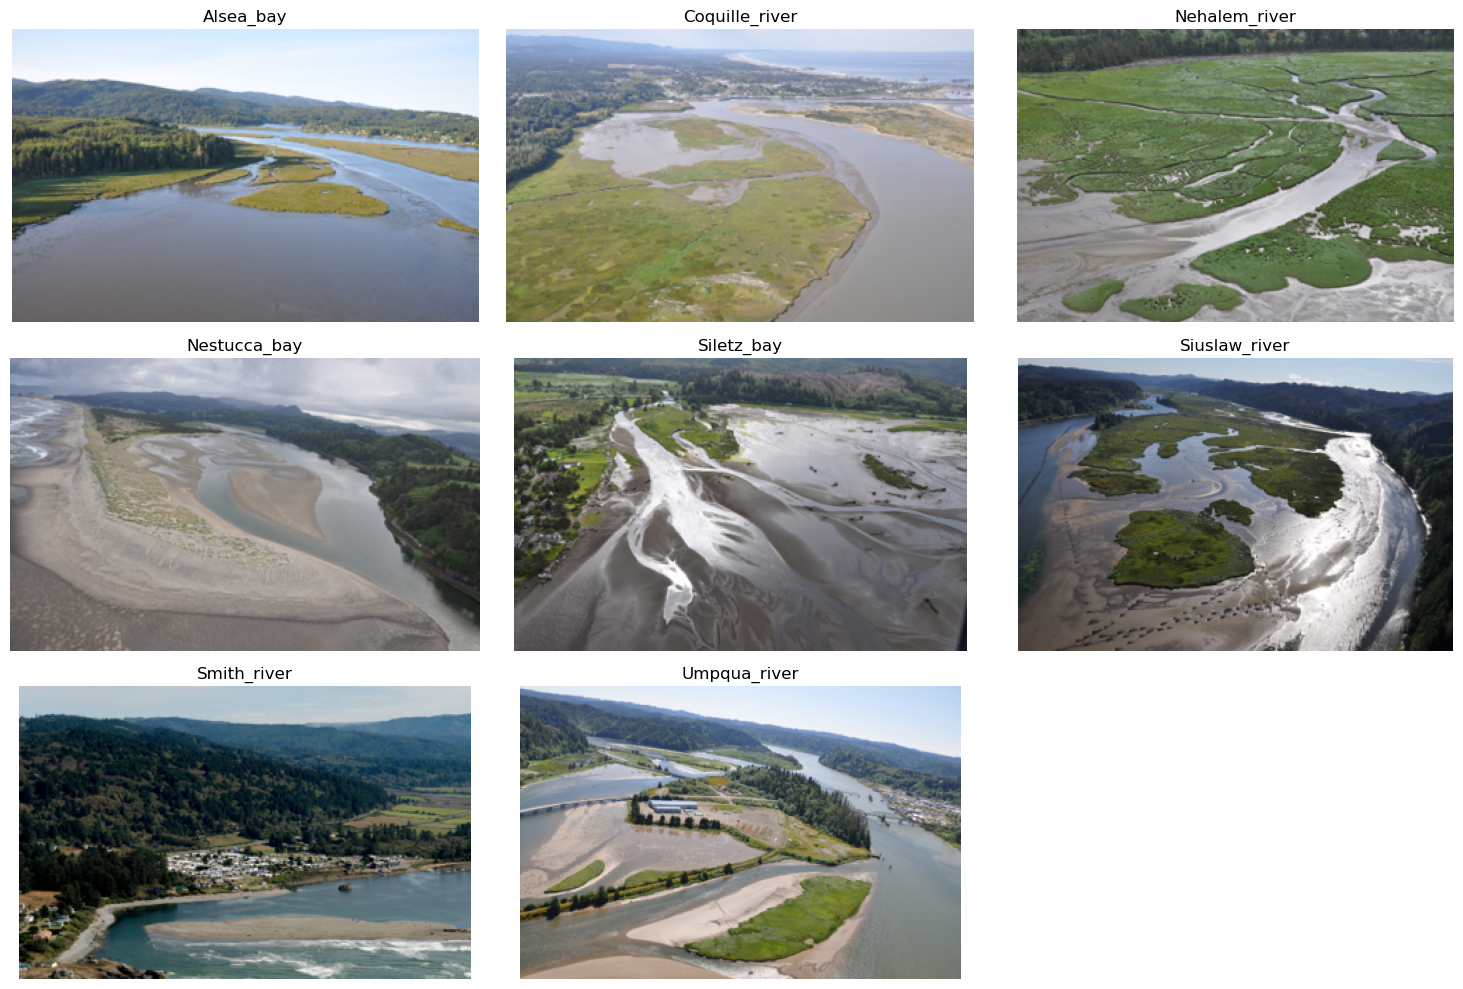

In [21]:
image_dir = "Data/Photo"      #Directory containing images
display_images(image_dir)

Add the name of the case of Study

In [34]:
selection = 'Alsea_bay'  #Add the name of the case of Study

### 2.2 Intertidal Area

The intertidal information was collected from the study conducted by Murray et al. (2019), they presented a study on intertidal flats, which are one of the most extensive coastal ecosystems, and have largely remained uncharted due to the challenges in global mapping. Therefore, they carried out research with 700,000 satellite images over 33 years (1984-2016) to map the changes in tidal flats. The methodology presented is summarized as follows:

-	Mapping of the area: The study area focuses on mapping tidal flats between 60° N and 60° S using Landsat satellite images, and the width analyzed was limited between the terrestrial and marine environment.
-	Remote-sensing methodology: The Google Earth Engine tool was used, where machine learning classification (random-forest) was used, and three classes were determined: tidal flat, permanent water and others.
-	Validation: The authors used different validation and accuracy evaluation methods. Creating an independent data set (1358 samples) for validation is highlighted. Finally, the general accuracy was 82.3% and in areas with more information, such as Australia, an agreement of 84.6% was obtained.

The final product gives us a clue about estimating the global trajectory of tidal flats, where the percentage changes and the trajectory lines of the tidal flats were estimated at a global and regional level.

Link: https://www.intertidal.app/home
Published as: Murray N. J., Phinn S. R., DeWitt M., Ferrari R., Johnston R., Lyons M. B., Clinton N., Thau D. & Fuller R. A. (2019) 
The global distribution and trajectory of tidal flats. Nature. 565:222-225. http://dx.doi.org/10.1038/s41586-018-0805-8 


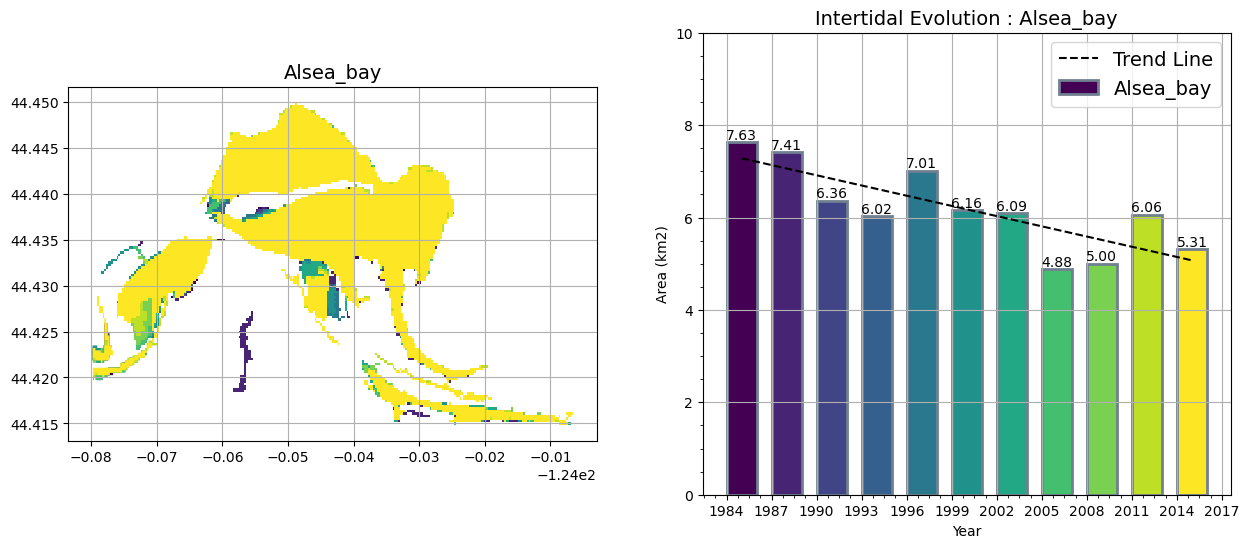

In [35]:
shapefile_path = 'Data/Intertidal_Area/Intertidal_Area_App_EST_.shp'
df = analyze_intertidal_area(shapefile_path, selection)
Int_area = pd.DataFrame(df)
Int_area.rename(columns={'area': 'Ai'}, inplace=True)

### 2.3 Hydrology Information
In order to determine the river discharge, the National Water DashBoard website  (USGV,2022) generate an interface for observer plus 13,000 stations of streams, lakes, reservoirs, precipitation, water quality and groundwater in the weather in context with current climatic conditions. It also has the historical record of these variables in the US.

DataBase: https://dashboard.waterdata.usgs.gov/app/nwd/en/?aoi=default

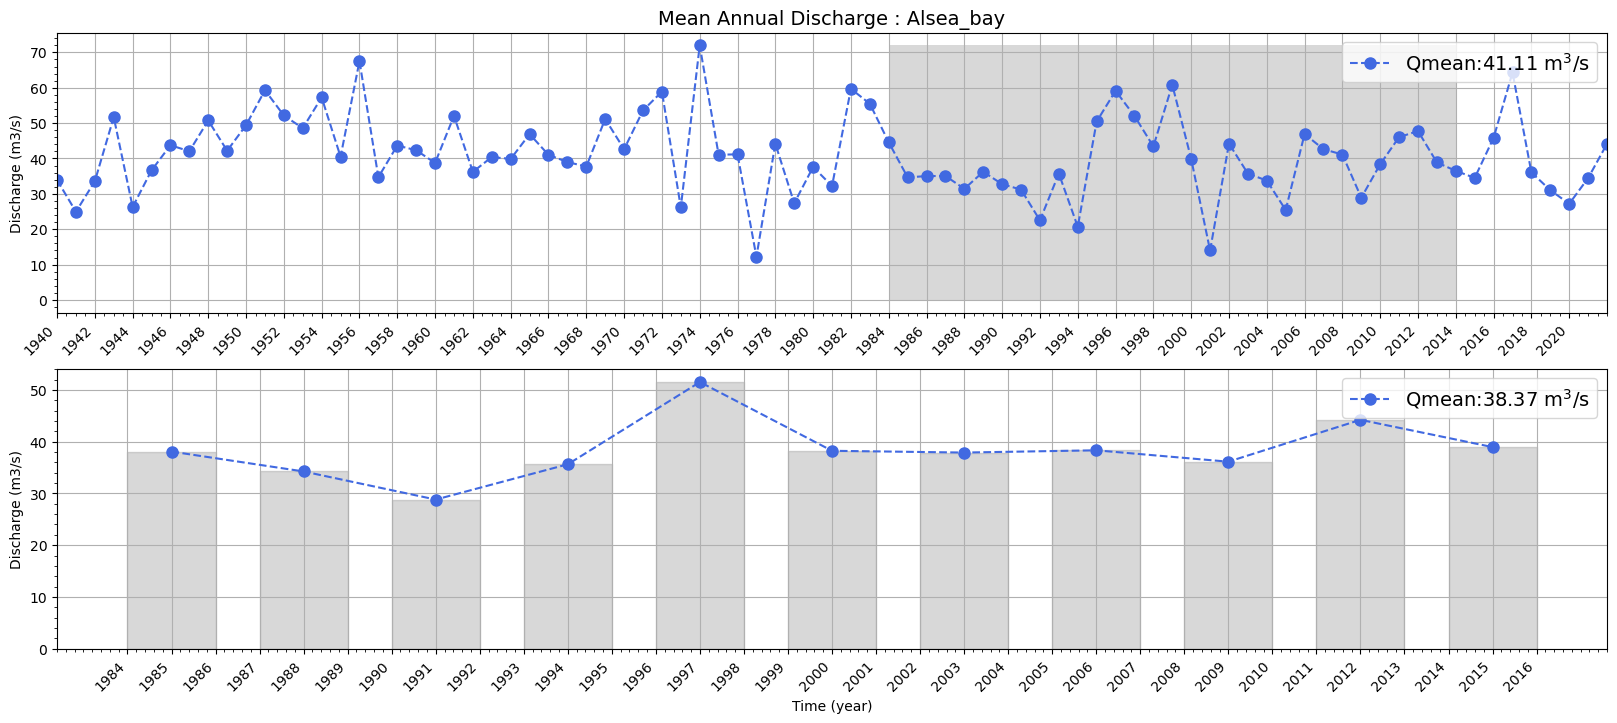

In [36]:
df2 = analyze_hydrology(selection)
Hyd = pd.DataFrame(df2)
Hyd.rename(columns={'Mean_Q': 'Qr'}, inplace=True)

### 2.4 Tidal Information
Within the study area is located **station 575 Charleston, OR, United States of America (Lat: 43.345°N and Lon: 124.322°W)** with approximately 50 years of historical data about water levels and tide calendar in the format of hourly and daily data.

Reference: https://uhslc.soest.hawaii.edu/stations/?stn=261#levels

Note: With this code you can extract information from other stations

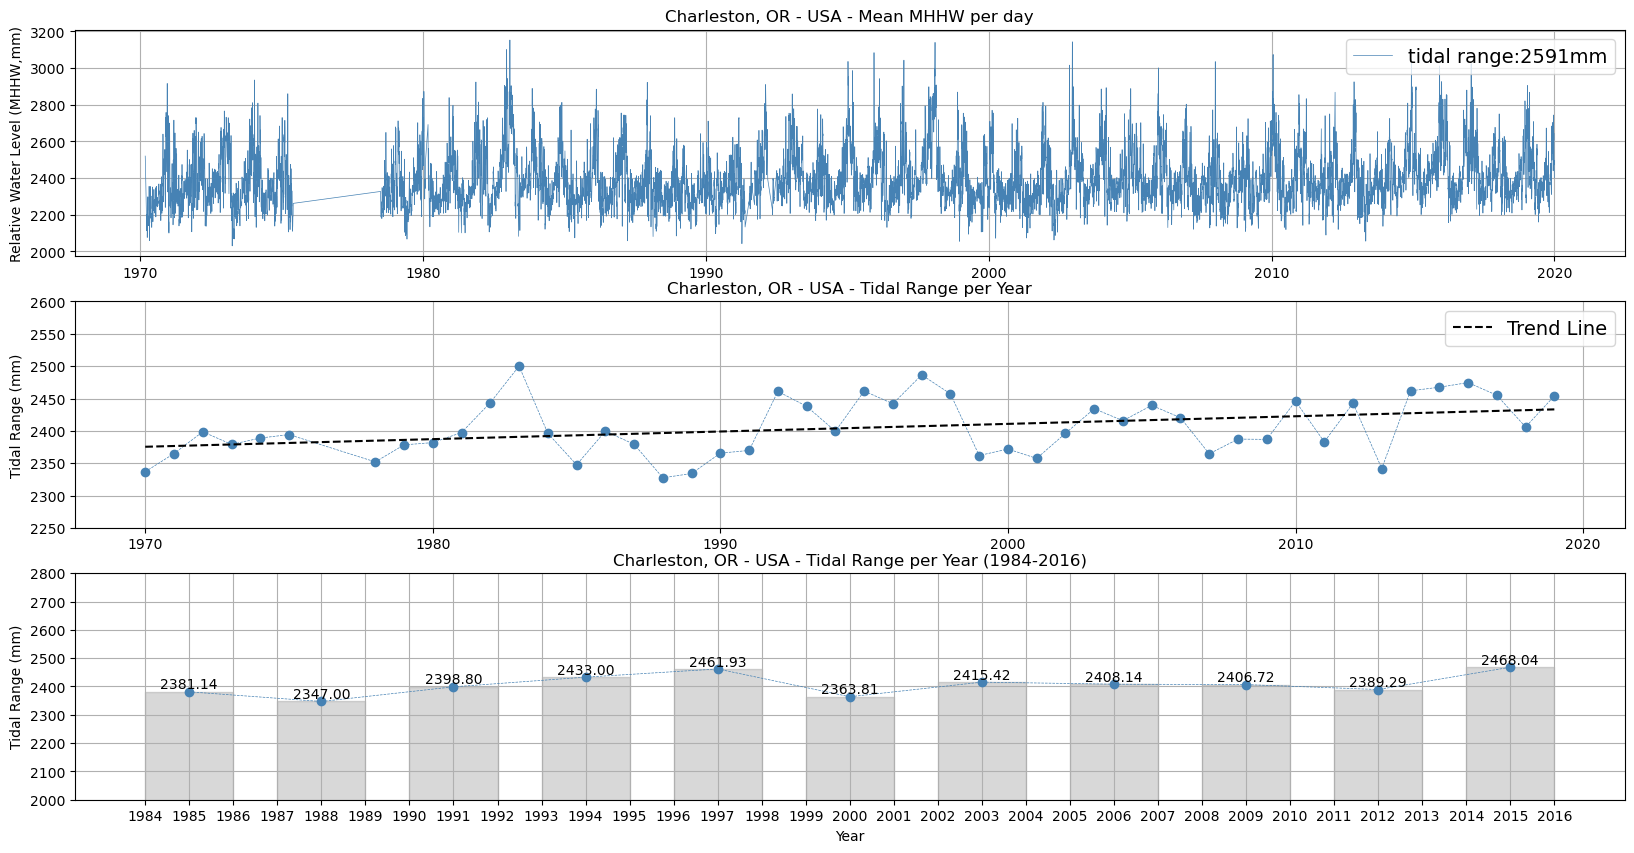

In [37]:
# Call the function
tidal_data = analyze_tidal_data()
Tid = pd.DataFrame(tidal_data)
Tid.rename(columns={'Tidal Range (mm)': 'dH'}, inplace=True)

### 2.5 Channel Area
The channel area was calculated based on the difference of the estuary area minus the intertidal area, for the years 2016 and 1984. The example presents the case of 2016.The information was saved in a shapefile.

In [38]:
# Call the function with the specified estuary selection 2016
channel_data = analyze_channel_area(selection)
Chn_area = pd.DataFrame(channel_data)
Chn_area.rename(columns={'name2': 'Est'}, inplace=True)
Chn_area.rename(columns={'area': 'Ac'}, inplace=True)
Chn_area

Valid estuary selected: Alsea_bay


,Est,Ac
0,Alsea_bay,8.557507


### 2.6 Determination of nearshore slopes and depth of closure
In order to determine the closure depth and slope, Athanasiou (2019) presented the results in the study **"Global distribution of nearshore slopes with implications for coastal retreat"** and generated a global database to determine the nearshore slope. The information generated is global and provides information every 1 km along the coastline. 

Link: https://data.4tu.nl/articles/_/12712265/1
Reference: Panagiotis Athanasiou (2019): Global distribution of nearshore slopes. Version 1. 4TU.ResearchData. dataset. https://doi.org/10.4121/uuid:a8297dcd-c34e-4e6d-bf66-9fb8913d983d
Other citation styles (APA, Harvard, MLA, Vancouver, Chicago, IEEE) available at Datacite


In [39]:
select_nearshore = analyze_nearshore_data(selection)
NeasS_Slope = pd.DataFrame(select_nearshore)
NeasS_Slope.rename(columns={'name': 'Est'}, inplace=True)
NeasS_Slope.rename(columns={'slope': 'betas'}, inplace=True)
NeasS_Slope.rename(columns={'dc': 'cd'}, inplace=True)
NeasS_Slope

Valid estuary selected: Alsea_bay


,Est,betas,cd
0,Alsea_bay,0.010424,21.700544


### 2.7 Synthesis of Generated Information
Information generated for each year.

In [40]:
merged_df = pd.merge(Int_area, Hyd, on='Year')
merged_df = pd.merge(merged_df, Tid, on='Year')
merged_df['Qr'] = merged_df['Qr'] *0.0283168466
merged_df['dH'] = merged_df['dH'] *0.001
merged_df

,Est,Year,Ai,Qr,dH
0,Alsea_bay,1985.0,7.633227,38.086159,2.381139
1,Alsea_bay,1988.0,7.410096,34.244506,2.347000
2,Alsea_bay,1991.0,6.364183,28.815223,2.398801
3,Alsea_bay,1994.0,6.022499,35.632976,2.433000
4,Alsea_bay,1997.0,7.014671,51.517783,2.461931
5,Alsea_bay,2000.0,6.161850,38.238126,2.363806
6,Alsea_bay,2003.0,6.091472,37.897380,2.415417
7,Alsea_bay,2006.0,4.883022,38.330627,2.408139
8,Alsea_bay,2009.0,5.004502,36.132296,2.406722
9,Alsea_bay,2012.0,6.057824,44.221475,2.389292


Extract for 2016

In [41]:
# Concatenate the last line with the other DataFrames based on 'Est'
Ly = pd.merge(merged_df.tail(1), Chn_area)
Ly= pd.merge(Ly,NeasS_Slope)
Ly 

,Est,Year,Ai,Qr,dH,Ac,betas,cd
0,Alsea_bay,2015.0,5.310447,38.954542,2.468042,8.557507,0.010424,21.700544


## 3. Input Data
In the initial phase of the study, the focus lies on the selection of comprehensive datasets that furnish sufficient information for subsequent analysis. Following this, the subsequent step involves gathering pertinent data, encompassing intertidal area (`Ai`), channel area (`Ac`), tidal difference (`dH`), river flow (`Qr`),change in sediment supply (`ssc`), closure depth (`cd`), dune height (`du`), active shorezone slope (`betas`), and sea level projection (`slr`). 

Furthermore, calibration and sensitivity parameters within the model were identified, as listed below.

- `incAi`: Rate of annual intertidal area expansion. 
- `erc`: Factor governing the entrapment of river-supplied sediment from the river into the channel.
- `ecs`: Factor controlling the entrapment of river-supplied sediment from the channel into the shoreline.
- `fis`: Factor for transport from river to intertidal area under river sediment supply change.
- `fs`: Factor responsible for the distribution of intertidal area deposition to intertidal area width and channel slope.
- `si`: Factor influencing the increase in intertidal area slope at its edge.
- `faw`: Factor responsible for reducing `fs` and `fis` in case of a decrease in yearly sediment transport from the river into the channel.

As part of the project's case study, we processed the values previously calculated from satellite information (which can be found in the references). The rest of the values were entered manually, and you can find them detailed in the investigation report. 

During the calibration phase, we determined that the `si` factor was the most sensitive, with a characteristic value ranging from `0.06 to 0.13` for U.S West Coast. 

In [42]:
input_data = morquest_set_input(Ac=Ly ['Ac']*1000000,   #channel area, m2
                                Ai=Ly ['Ai']*1000000,   #intertidal area, m2
                                dH=Ly ['dH'],           #tidal difference, m
                                Qr=Ly ['Qr'],           #river flow, m3/s
                                fQr=0,                  #factor for river flow
                                ssc=0.1,                #river suspended sediment concentration, give always value to prevent div0, mg/l, g/m3
                                fssc=0,                 #factor for ssc
                                slr=0.53,               #sea level rise after 'dur' years, m
                                lsys=5503,              #empirically derived; system length scale
                                cl=1e6,                 #coastline length, m
                                betas=Ly ['betas'],     #active shorezone slope [-]
                                cd=Ly ['cd'],           #closure depth, m
                                fd=1.5,                 #dune factor, m
                                du=10,                  #dune height above active zone, for Bruun rule, m
                                por=0.4,                #porosity, -
                                rho=2650,               #sediment density, kg/m3
                                dur=100,                #timespan calculation, yr
                                T=43200,                #tidal period, s
                                slrtype='linear',       #sea level rise type: 'accel'/'linear'
                                incAi=0,                #increase it area per year as percentage of intertidal area at t=0,
                                tr=0,                   #exchange from channel to shore as percentage of instantaneous total exchange
                                erc=0.5,                #maximun river supply entrapment portion from river into channel, -
                                ecs=0.5,                #maximum river supply entrapment portion from channel into shoreline, -
                                fis=0.5,                #calibration factor for transport from river to it area under river sedsupply change, 1 menas all excess sedimen supply to itarea, [0 1], -
                                si=0.10,                #factor increasing intertidal area slope at edge for slr computations ; smaller value implies less intertidal area under slr. 1 = linear. (no effect if ~ >10), [0 inf], -
                                fs=0.5,                 #factor distributing it area deposition to it area width and channel slope, [0 1], -; 
                                faw=0.5                 #factor diminishing fs and fis in case of lowering Qrc, [0 1], -;
                               )

## 4. Execution of the code
The Morquest code is programmed within the file `morquest.py`. To execute it, simply run the code `run_morquest(input_data, 'output.mat')`. The results are saved in a '.mat file'. Additionally, a summary table of the general information regarding the main output variables has been generated.

In [43]:
Run_morquest(input_data, 'output.mat')          #Save the file
data = scipy.io.loadmat('results/output.mat')   #Reading the file
title_text_bold = selection
print('Done')

Done


Reading information from the `.mat` file

In [44]:
flattened_data = {}
for key, value in data.items():
    flattened_data[key] = np.ravel(value)
  
Ac= flattened_data['Ac']
Ai= flattened_data['Ai']
hc= flattened_data['hc']
hi= flattened_data['hi']
Vc= flattened_data['Vc']
Vi= flattened_data['Vi']
Vd= flattened_data['Vd']
Vs= flattened_data['Vs']
sedVc= flattened_data['sedVc']
sedVi= flattened_data['sedVi']
sedVd= flattened_data['sedVd']
sedVs= flattened_data['sedVs']
Qci= flattened_data['Qci']
Qcd= flattened_data['Qcd']
Qcs= flattened_data['Qcs']
Qso= flattened_data['Qso']
at= flattened_data['at']
slr=flattened_data['slr']
yr=flattened_data['yr']
dur=flattened_data['dur']

a1 = np.max(slr)/(dur + 1)
slr2 = np.arange(0,max(slr),a1)
a = max(yr)+1 

df = pd.DataFrame({'yr':yr, 'slr2': slr2, 'at': at, 'Ac': Ac, 'Ai': Ai, 'hc': hc, 'hi': hi, 'Vc': Vc, 'Vi': Vi, 'Vd': Vd,
                   'Vs': Vs, 'sedVc': sedVc, 'sedVi': sedVi, 'sedVd': sedVd, 'sedVs': sedVs, 'Qci': Qci, 'Qcd': Qcd,
                   'Qcs': Qcs, 'Qso': Qso,})
df.head()

,yr,slr2,at,Ac,Ai,hc,hi,Vc,Vi,Vd,Vs,sedVc,sedVi,sedVd,sedVs,Qci,Qcd,Qcs,Qso
0,0,0.000000,3.054388,8.557507e+06,5.310447e+06,1.105763,1.234021,9.462572e+06,6.553202e+06,4.131774e+06,3.388235e+10,0.000000,6.553202e+06,0.000000,0.000000,0.000000,0.000000,77262.29155,77262.291550
1,1,0.005248,2.947797,8.671547e+06,5.196407e+06,1.112714,1.212297,9.648955e+06,6.299591e+06,4.131774e+06,3.388235e+10,-13210.860835,6.524754e+06,0.000000,0.000000,8097.027078,5113.833758,77262.29155,38631.145775
2,2,0.010495,2.833225,8.783137e+06,5.084817e+06,1.121026,1.188505,9.846126e+06,6.043330e+06,4.136888e+06,3.388239e+10,-30979.556459,6.505015e+06,5113.833758,38631.145775,14251.138832,3517.556792,77262.29155,38631.145775
3,3,0.015743,2.712549,8.892331e+06,4.975623e+06,1.129679,1.162918,1.004548e+07,5.786244e+06,4.140406e+06,3.388243e+10,-51687.355215,6.492027e+06,8631.390549,77262.291550,18427.943021,2279.855734,77262.29155,38631.145775
4,4,0.020990,2.587742,8.999180e+06,4.868774e+06,1.138488,1.135850,1.024546e+07,5.530195e+06,4.142685e+06,3.388247e+10,-74299.938786,6.483801e+06,10911.246284,115893.437325,21205.181984,1407.401587,77262.29155,38631.145775


## 5. Graphical Representation of Results

The results extracted within morQuest enable analysis of how the main elements evolve over the analyzed time period
### 5.1. Intertidal Area, Channel Area and Adaptation Time Scale.

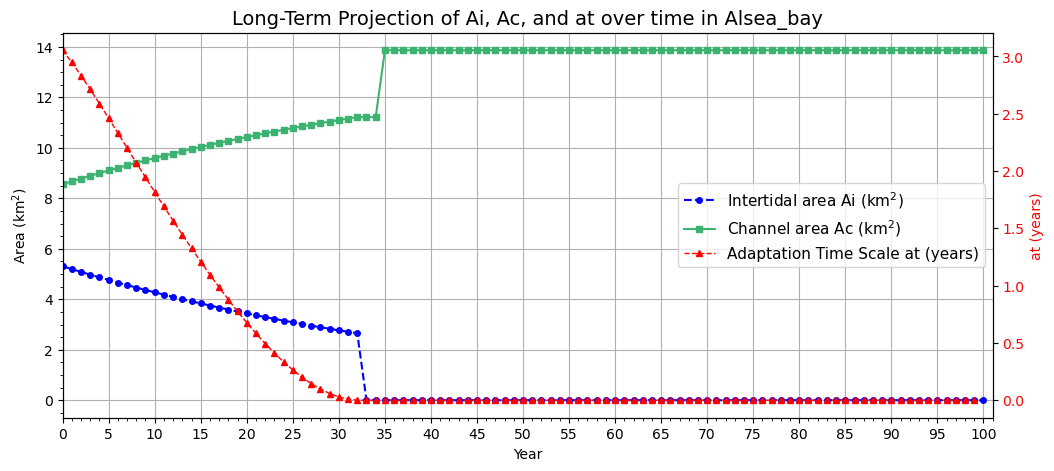

In [45]:
# Create a figure and axis for the primary scale (left)
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(111)

ax1.plot(yr, Ai/1000000, label = 'Intertidal area Ai (km$^2$)', linewidth=1.5, linestyle = '--', marker = 'o', markersize=4, color ="b")
ax1.plot(yr, Ac/1000000, label = 'Channel area Ac (km$^2$)', linewidth=1.5, linestyle = '-', marker = 's', markersize=4, color ="#3CB371")
ax1.set_xlabel('Year')
ax1.set_ylabel('Area (km$^2$)')
ax1.tick_params(axis='y')
plt.grid()
plt.minorticks_on()
plt.xticks(np.arange(0,a,5))
plt.xlim(0,a)

# Create a secondary axis for the second scale (right)
ax2 = ax1.twinx()
ax2.plot(yr, at, label = 'Adaptation Time Scale at (years)', linewidth=1, linestyle = '--', marker = '^', markersize=4, color= 'r')
ax2.set_ylabel('at (years)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends for both scales
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='best', fontsize=11)

plt.title(f'Long-Term Projection of Ai, Ac, and at over time in {title_text_bold}', fontsize=14, color="black")
plt.savefig(f'results/01-Long-Term Trajectory of Ai, Ac and at over time in {title_text_bold}.png', bbox_inches='tight')

### 5.2. Intertidal Depth and Channel Depth.

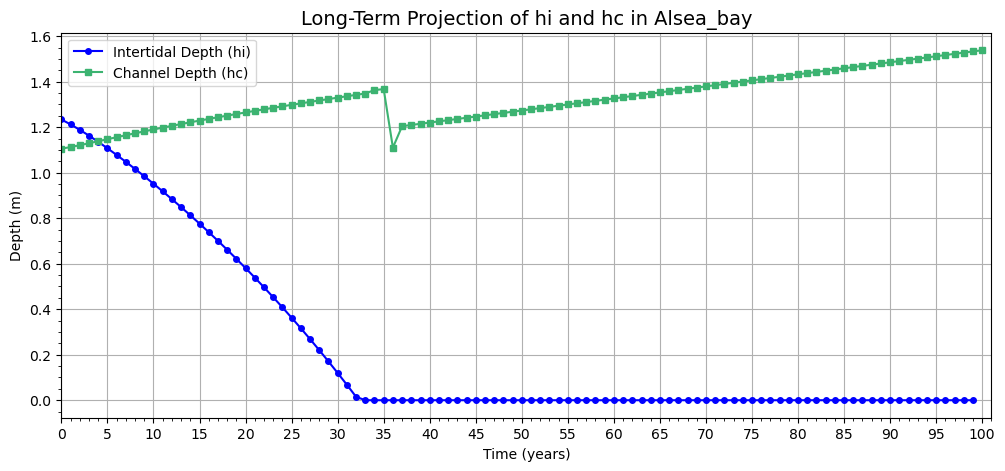

In [46]:
fig = plt.figure(figsize=(12,5))
#plt.subplot(231)
plt.plot(yr, hi, label = 'Intertidal Depth (hi)', color='b',linewidth = 1.5, linestyle = '-',marker='o', markersize=4)
plt.plot(yr, hc, label = 'Channel Depth (hc)', color='#3CB371',linewidth = 1.5, linestyle = '-',marker='s', markersize=4)
#plt.plot(output['yr'], slr2, label = 'Sea Level',color='#00008B',linewidth = 1.5, linestyle = '-',marker='v', markersize=4)
plt.legend([], borderpad=0.5, labelspacing=1.0, fontsize=15)

plt.ylabel('Depth (m)')
plt.xlabel('Time (years)')
plt.minorticks_on()
plt.xticks(np.arange(0,a,5))
plt.xlim(0,a)
plt.legend()
plt.grid(True)
plt.title(f'Long-Term Projection of hi and hc in {title_text_bold}', fontsize=14, color="black")
plt.savefig(f'results/02-Long-Term Trajectory of hi and hc in {title_text_bold}.png', bbox_inches='tight')

### 5.3. Intertidal, Channel and Delta Volume

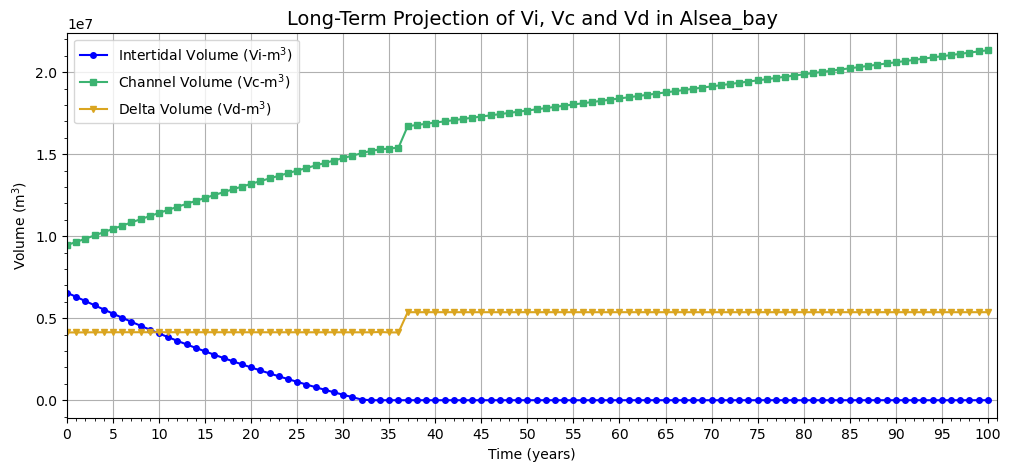

In [47]:
fig = plt.figure(figsize=(12,5))
#plt.subplot(231)
plt.plot(yr, Vi, label = 'Intertidal Volume (Vi-m$^3$)', color='b',linewidth = 1.5, linestyle = '-',marker='o', markersize=4)
plt.plot(yr, Vc, label = 'Channel Volume (Vc-m$^3$)', color='#3CB371',linewidth = 1.5, linestyle = '-',marker='s', markersize=4)
plt.plot(yr, Vd, label = 'Delta Volume (Vd-m$^3$)',color='#DAA520',linewidth = 1.5, linestyle = '-',marker='v', markersize=4)
#plt.plot(yr, Vs, label = 'Shoreline Volume (Vs)',color='#8B008B',linewidth = 1.5, linestyle = '-',marker='*', markersize=4)
plt.legend([], borderpad=0.5, labelspacing=1.0, fontsize=15)

plt.ylabel('Volume (m$^3$)')
plt.xlabel('Time (years)')
plt.minorticks_on()
plt.xticks(np.arange(0,a,5))
plt.xlim(0,a)
plt.legend()
plt.grid(True)
plt.title(f'Long-Term Projection of Vi, Vc and Vd in {title_text_bold}', fontsize=14, color="black")
plt.savefig(f'results/03-Long-Term Trajectory of Vi, Vc and Vd in {title_text_bold}.png', bbox_inches='tight')

### 5.4. Intertidal, Channel and Delta Sed Volume

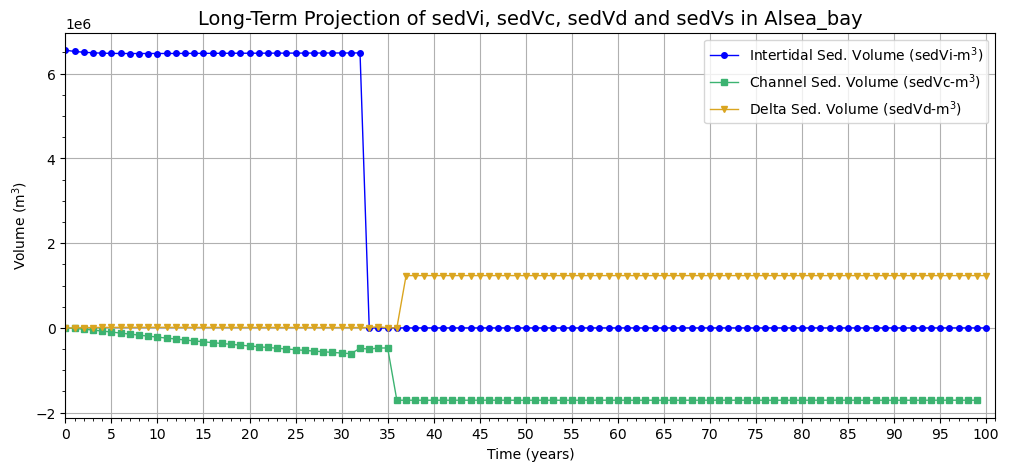

In [48]:
#PLOTEO 
fig = plt.figure(figsize=(12,5))
#plt.subplot(231)
plt.plot(yr, sedVi, label = 'Intertidal Sed. Volume (sedVi-m$^3$)', color='b',linewidth = 1., linestyle = '-',marker='o', markersize=4)
plt.plot(yr, sedVc, label = 'Channel Sed. Volume (sedVc-m$^3$)', color='#3CB371',linewidth = 1., linestyle = '-',marker='s', markersize=4)
plt.plot(yr, sedVd, label = 'Delta Sed. Volume (sedVd-m$^3$)',color='#DAA520',linewidth = 1., linestyle = '-',marker='v', markersize=4)
#plt.plot(yr, sedVs, label = 'Shoreline Sed. Volume (sedVs-m$^3$)',color='#8B008B',linewidth = 1., linestyle = '-',marker='*', markersize=4)
plt.legend([], borderpad=0.5, labelspacing=1.0, fontsize=15)

plt.ylabel('Volume (m$^3$)')
plt.xlabel('Time (years)')
plt.minorticks_on()
plt.xticks(np.arange(0,a,5))
plt.xlim(0,a)
plt.legend()
plt.grid(True)

plt.title(f'Long-Term Projection of sedVi, sedVc, sedVd and sedVs in {title_text_bold}', fontsize=14, color="black")
plt.savefig(f'results/04-Long-Term Trajectory of sedVi, sedVc, sedVd and sedVs in {title_text_bold}.png', bbox_inches='tight')

### 5.5. Qci, Qcd, Qcs and Qso

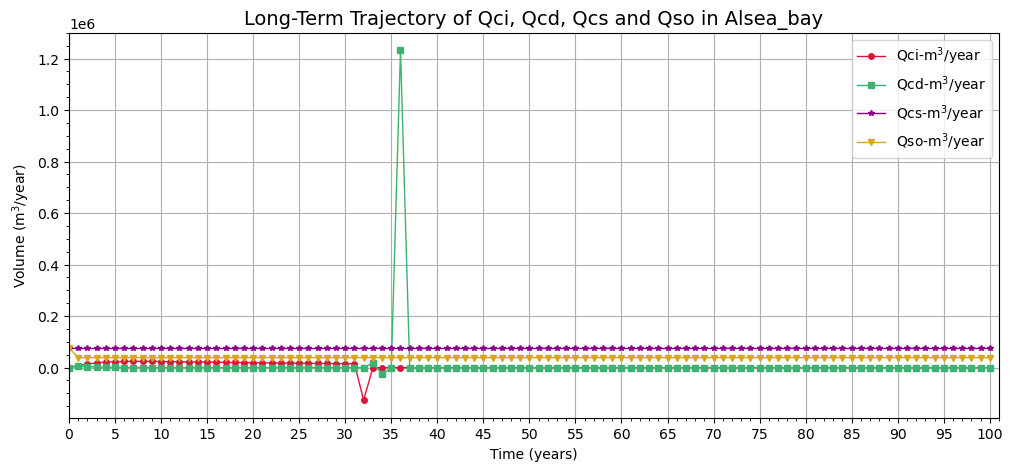

In [49]:
#PLOTEO 
fig = plt.figure(figsize=(12,5))
#plt.subplot(231)
plt.plot(yr, Qci, label = 'Qci-m$^3$/year', color='#DC143C',linewidth = 1., linestyle = '-',marker='o', markersize=4)
plt.plot(yr, Qcd, label = 'Qcd-m$^3$/year', color='#3CB371',linewidth = 1., linestyle = '-',marker='s', markersize=4)
plt.plot(yr, Qcs, label = 'Qcs-m$^3$/year',color='#8B008B',linewidth = 1., linestyle = '-',marker='*', markersize=4)
plt.plot(yr, Qso, label = 'Qso-m$^3$/year',color='#DAA520',linewidth = 1., linestyle = '-',marker='v', markersize=4)
plt.legend([], borderpad=0.5, labelspacing=1.0, fontsize=15)
plt.xticks(np.arange(0,a,5))
plt.xlim(0,a)
plt.ylabel('Volume (m$^3$/year)')
plt.xlabel('Time (years)')
plt.minorticks_on()
plt.legend()
plt.grid(True)

plt.title(f'Long-Term Trajectory of Qci, Qcd, Qcs and Qso in {title_text_bold}', fontsize=14, color="black")
plt.savefig(f'results/05-Long-Term Trajectory of Qci, Qcd, Qcs and Qso in {title_text_bold}.png', bbox_inches='tight')
